# Implementing Reinforcement Learning algorithms to make game bots

### Made by - <br> 

Aayush Agarwal (18csu004)<br>
Bharat Baweja (18csu043)<br>
Bharat Kumar Sharma (18csu044)<br>

In this project we implemented q learning algorithm for playing frozen lake(8x8) game, deep q learning algorithm for playing Lunar lander game and then we implemented deep q learning algorithm using rl library to compare results of algorithm implemented by us and a proven efficient algorithm. 

Our main motivation of making such a project was OpenAI gym library where we saw various environments of games that could be used to make a computer bot that can play these games with a good accuracy and can explore and exploit the environment to maximize the reward function.

# Frozen Lake(8x8)

The agent controls the movement of a character in a grid world. Some tiles of the grid in frozen lake are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile. 
There are 4 types of tile - 
1. S: starting point, safe<br>
2. F: frozen surface, safe<br>
3. H: hole, fall to your doom<br>
4. G: goal, finishing point

# Q Learning algorithm

Q-Learning is a value-based reinforcement learning algorithm which is used to find the optimal action-selection policy using a Q function. Our goal is to maximize the value function Q. The Q table helps us to find the best action for each state

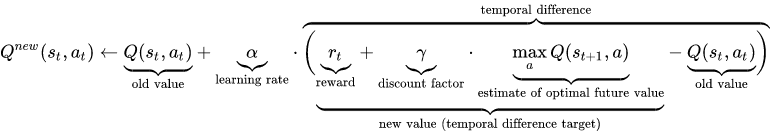

##### Policy : <br>
1. The way the agent behaves in a given time. <br>
2. It is a mapping from the states of the environment  to the actions the agent takes in the environment.<br> 
3. The policy can be a simple function or lookup table in the simplest cases, or it may involve complex function computations. <br> 

##### Reward function : <br>
1. The goal of a reinforcement learning problem. We need to reach the final tile of lake<br>
2. On each time step, the action of the agent results on a reward. <br>
3. The agent’s final objective is to maximize the total reward it receives. So whenever the agent falls into hole during an episode we give it an negative reward to disuade it from following that action<br>
4. The reward thus distinguish between the good and bad action results for the agent. <br>
5. In a natural system, we might think of rewards as pleasure and pain experiences.<br>
6. The reward is the primary way for impacting the policy; if an action selected by the policy results in a low reward, then the policy can be changed to select some other action in the same situation.<br>

##### State
The state describes the current situation i.e all the current structure of lake<br>

##### Action
Action describes the movements and decisions of the agent<br>

##### Exploration and Explotation
1. An Reinforcement Learning agent will gradually learns the best (or near-best) policy essentially based on trial and error, through random interactions with the  environment and by incorporating the responses of these interactions, in order to improve the overall performance. 
2. One of the challenges that arise in reinforcement learning, and not in other kinds of learning, is the trade-oﬀ between exploration and exploitation. 
3. The agent’s actions serve both as a means to explore (learn better strategies) and a way to exploit (greedily use the best available strategy). 
4. Since exploration is costly in terms of resource, time and opportunity, the agent have to balance between greedily exploiting what he learned so far and choose actions that currently yield the highest reward, and continuously explore the environment to acquire more information to potentially achieve a higher value in the long term.<br>

##### Q table
Q-Table is just a name for a simple lookup table where we calculate the maximum expected future rewards for action at each state. Each Q-table score will be the maximum expected future reward that the robot will get if it takes that action at that state. The 'q' in q-learning stands for quality. Quality in this case represents how useful a given action is in gaining some future reward.


### Libraries Imported

In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [2]:
# We first make an environment of frozen lake using gym library
env = gym.make("FrozenLake8x8-v0")

# Action spce the actions our agent can take. In this case up, down, left and right
# State space is matrix size of the environment. In this case 8x8=64
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
print("Action space :",action_space_size)
print("State space : ",state_space_size)
print("Environment type : ",env.observation_space)

Action space : 4
State space :  64
Environment type :  Discrete(64)


In [3]:
# Make a q table with all elements as zero and size as state space x action_Space
q_table = np.zeros((state_space_size, action_space_size))

# Number of episodes for which algorithm runs
num_episodes = 2_50_000

# After how many episodes does the algorithm stops exploitation and does exploration to find a better solution
max_steps_per_episode = 400

# The learning rate to determine to what extent newly acquired information overrides old information. 
# A factor of 0 makes the agent learn nothing , while a factor of 1 makes the agent consider only the most recent information. 
learning_rate = 0.8

# The discount factor determines the importance of future rewards. 
# A factor of 0 will make the agent short-sighted by only considering current rewards (in the update rule above), while a factor of 1 will make it strive for a long-term high reward. 
discount_rate = 0.99

# This exploration rate is the probability that our agent will explore the environment rather than exploit it.
exploration_rate =1
max_exploration_rate =1
min_exploration_rate =0.001
exploration_decay_rate = 0.00005
print(q_table)
print(q_table.shape)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(64, 4)


## Steps

Step 1 : We run the agent for 250000 episdoes to train it for learning to play the game.<br>

Step 2 : We give a condition to terminate the episode so that our agent doesnt stuck in 1 episode and it moves ahead after maximum 400 steps <br>

Step 3 : Give a exploration condition so that our agent doesn't focus on just 1 winable condition and explores further for a better option.

Step 4 : We use env.step(action) function that returns : -<br>

1. new state: which represents environments state <br>
2. reward:  a float of reward in previous action <br>
3. done: when its time to reset the environment or goal achieved<br> 
4. info: a dict for debugging, it can be used for learning if it contains raw probabilities of environment’s last state.<br>

Step 5 : Update the q table according to reward and new state.

Step 6 : Update the current new_state and reward list. 

Step 7 : Update the exploration rate and append the rewards and details. 

In [4]:
# reward List of all episodes
rewards_all_episodes = []

details=[]

for episode in range(num_episodes):
    state=env.reset()
    if episode%10000==0: # Prints the episode number after every 10000 episode  
        print("Episode Number: ",episode)
    done=False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = random.uniform(0,1)  
        if exploration_rate_threshold>exploration_rate: 
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done,info = env.step(action)

        q_table[state,action] = q_table[state,action] * (1-learning_rate) + \
            learning_rate*(reward + discount_rate * np.max(q_table[new_state,:])) 

        state = new_state
        rewards_current_episode += reward
        

        if done==True:
            break

    exploration_rate = min_exploration_rate + (max_exploration_rate-min_exploration_rate)* np.exp(-exploration_decay_rate*episode)  

    rewards_all_episodes.append(rewards_current_episode)
    details.append([new_state, reward, done,info])


rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),(num_episodes)/1000)

print(q_table)
np.savetxt("Q_TABLE_FROZENLAKE",q_table)



Episode Number:  0
Episode Number:  10000
Episode Number:  20000
Episode Number:  30000
Episode Number:  40000
Episode Number:  50000
Episode Number:  60000
Episode Number:  70000
Episode Number:  80000
Episode Number:  90000
Episode Number:  100000
Episode Number:  110000
Episode Number:  120000
Episode Number:  130000
Episode Number:  140000
Episode Number:  150000
Episode Number:  160000
Episode Number:  170000
Episode Number:  180000
Episode Number:  190000
Episode Number:  200000
Episode Number:  210000
Episode Number:  220000
Episode Number:  230000
Episode Number:  240000
[[2.28391864e-01 2.25763752e-01 2.26230144e-01 4.09187196e-01]
 [2.43170075e-01 2.34980225e-01 4.08585111e-01 2.34733715e-01]
 [2.39926994e-01 2.37262526e-01 2.39592013e-01 4.10551734e-01]
 [2.57081416e-01 2.50417817e-01 4.15829152e-01 2.57481961e-01]
 [2.78201862e-01 4.16079428e-01 4.71075035e-01 2.76217696e-01]
 [2.95754465e-01 4.65685401e-01 2.95820975e-01 2.96902691e-01]
 [3.12562955e-01 3.15927062e-01 4.99

## Testing our model for 3 episodes on the basis of our trained Q table 

In [5]:
for episode in range(3):
    state = env.reset()
    done=False
    print("Episode: ", episode+1)
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)

        action= np.argmax(q_table[state,:])
        new_state,reward, done, info = env.step(action)

        if done:
            clear_output(wait=True)
            env.render()

            if reward==1:
                print("GOAL REACHED")
                time.sleep(3)
            else:
                print("FELL THROUGH HOLE")
                time.sleep(3)
            clear_output(wait=True)
            break
        state=new_state
env.close()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
GOAL REACHED


# DEEP Q-LEARNING 
After implementing the q-learning on "FROZENLAKE 8X8" game, we moved on to create our deep Q-Learning model on another game named "Lunar Lander"

## LUNAR LANDER
Lunar Lander is a single-player arcade game in the Lunar Lander subgenre. It was developed by Atari, Inc. The player can rotate the module and burn fuel to fire a thruster, attempting to gently land on marked areas. The scenario resets after every successful landing or crash, with new terrain, until no fuel remains.

### LANDING AND REWARD POINT
In order to safely land a lunar module, it must have a speed near 0 m/s as it touches down on the moon's surface. The module must fire its thrusters as it descends, counteracting the downward acceleration due to gravity and thus reducing its speed as it nears the surface.

## TYPES OF ENVIRONMENT
LUNAR LANDER game available on two environment<br>
1) Discrete Environment<br>
2) Contiunous Environment<br>

### DISCRETE ENVIRONMENT
An environment is said to be discrete if there are a finite number of actions that can be performed within it. Examples: Discrete environment: A game of chess or checkers where there are a set number of moves

### CONTINUOUS ENVIRONMENT
A Continuous Environment is an environment where the possible choices you can make and things you can sense are infinite. Examples:Taxi driving. There could be a route from to anywhere to anywhere else

Both the environments are available in the gym library. Seeing the time and computational power we have, we decided to work on the discrete environment of Lunar Lander game as it is little easy and less time consuming. Having limited number of choices for the bot, it will be easy to implement deep Q-learning. For continuous environments, algorithms such as ACtor and Critic are preferable over Q-learning and Deep Q-learning as these algorithms focus more on policy rather than rewards.


## Importing Libraries

In [6]:
import gym
import random
from keras import Sequential
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.activations import relu, linear

## Making game environment using gym Library

In [7]:
import numpy as np
env = gym.make('LunarLander-v2')

## Deep Q-Learning 
The process of Q-Learning creates an exact matrix for the working agent which it can “refer to” to maximize its reward in the long run. Although this approach is not wrong in itself, this is only practical for very small environments and quickly loses it’s feasibility when the number of states and actions in the environment increases.

The solution for the above problem comes from the realization that the values in the matrix only have relative importance ie the values only have importance with respect to the other values. Thus, this thinking leads us to Deep Q-Learning which uses a deep neural network to approximate the values. This approximation of values does not hurt as long as the relative importance is preserved.

The basic working step for Deep Q-Learning is that the initial state is fed into the neural network and it returns the Q-value of all possible actions as on output.

## Implementing DQN

In [8]:
class DQN:

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1.0
        self.gamma = .99
        self.batch_size = 64
        self.epsilon_min = .01
        self.lr = 0.001
        self.epsilon_decay = .996
        self.memory = deque(maxlen=1000000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(150, input_dim=self.state_space, activation=relu))
        model.add(Dense(120, activation=relu))
        model.add(Dense(self.action_space, activation=linear))
        model.compile(loss='mse', optimizer=Adam(lr=self.lr))
        #model.save_weights("/dqn_model")
        model.save_weights('./checkpoints/dqn_model')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)
        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


def train_dqn(episode):

    loss = []
    agent = DQN(env.action_space.n, env.observation_space.shape[0])

    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 8))
        score = 0
        max_steps = 500
        for i in range(max_steps):
            action = agent.act(state)
            env.render()
            next_state, reward, done, _ = env.step(action)
            score += reward
            next_state = np.reshape(next_state, (1, 8))
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)

        # Average score of last 100 episode
        is_solved = np.mean(loss[-100:])
        if is_solved > 200:
            print('\n Task Completed! \n')
            break
        print("Average over last 100 episode: {0:.2f} \n".format(is_solved))
    agent.save_weights("dqn_scratch")
    return loss



In [9]:
'''
if __name__ == '__main__':
    episodes = 250
    loss = train_dqn(episodes)
    plt.plot([i+1 for i in range(0, len(loss), 2)], loss[::2])
    plt.show()
    '''

"\nif __name__ == '__main__':\n    episodes = 250\n    loss = train_dqn(episodes)\n    plt.plot([i+1 for i in range(0, len(loss), 2)], loss[::2])\n    plt.show()\n    "

## Graph for score per episodes
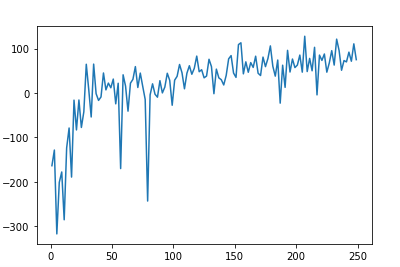

## Keras-RL DQN
After implementing our own deep Q-learning model, we tried to do the same thing using keras-rl library to see the difference between efficiency and the time taken by the both the algorithms.

## Keras-RL library
keras-rl implements some state-of-the art deep reinforcement learning algorithms in Python and seamlessly integrates with the deep learning library Keras. Furthermore, keras-rl works with OpenAI Gym out of the box. This means that evaluating and playing around with different algorithms is easy. Of course you can extend keras-rl according to your own needs. You can use built-in Keras callbacks and metrics or define your own. Even more so, it is easy to implement your own environments and even algorithms by simply extending some simple abstract classes.

We implement the same model on the same game to check out the difference between the our algorithm and the keras-rl algorithm.
## Importing Libraries

In [10]:
import numpy as np 
import gym 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten 
from keras.optimizers import Adam 
from keras.activations import relu,linear
from keras.callbacks import EarlyStopping 
from rl.agents.dqn import DQNAgent 
from rl.policy import EpsGreedyQPolicy 
from rl.memory import SequentialMemory 
import keras

## Making game Environment

In [11]:
env = gym.make('LunarLander-v2')

Since the game mode is discrete, their are only 4 actions i.e. up,right,down and left

In [12]:
n_actions = env.action_space.n 
print(n_actions)

4


## Creating Model

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(150, input_dim= env.observation_space.shape[0], activation=relu))
model.add(Dense(120, activation=relu))
model.add(Dense(env.action_space.n, activation=linear))
model.compile(loss='mse', optimizer='Adam')

## Setting up hyperparameters



In [14]:
memory = SequentialMemory(limit=1000000, window_length=1) #taking number of episodes max. limit as 10 lacs
policy = EpsGreedyQPolicy() #Epsilon greedy policy is a way of selecting random actions with uniform distribution from a set of available actions.
earlystop = EarlyStopping(monitor = 'episode_reward', min_delta=.1, patience=5, verbose=1, mode='auto') 
#Early stopping is designed to monitor the generalization error of one model and stop training when generalization error begins to degrade
callbacks = [earlystop] 
nb_steps_warmup = 1000 
target_model_update = .2 # Updating our target model after every 2 steps
gamma = .99 
lr = .0001 
training_steps = 400000 
epochs = training_steps/1000 
decay = float(lr/epochs) 

## Training the model

In [15]:
dqn = DQNAgent(model=model, nb_actions=n_actions,memory=memory, nb_steps_warmup=nb_steps_warmup, target_model_update = target_model_update, policy=policy, gamma = gamma)
dqn.compile(Adam(lr=lr), metrics=['mae']) # Train model 
#dqn.fit(env, nb_steps=training_steps, visualize=False, verbose=1) # After training is done, we save the final weights. 
dqn.save_weights('dqn_{}_weights.h5f'.format('new_keras_rl'), overwrite=True)

## Testing the model

In [18]:
memory = SequentialMemory(limit=75000, window_length=1) 
policy = EpsGreedyQPolicy() 
dqn = DQNAgent(model=model, nb_actions=n_actions, memory=memory,target_model_update = .2, nb_steps_warmup=10000, policy=policy) 
dqn.compile(Adam(lr=.0001), metrics=['mae']) 
dqn.load_weights('dqn_{}_weights.h5f'.format('keras-rl')) 
dqn.test(env, nb_episodes=10, visualize=True)

Testing for 10 episodes ...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Episode 1: reward: 176.569, steps: 529
Episode 2: reward: 117.437, steps: 727
Episode 3: reward: 152.412, steps: 774
Episode 4: reward: 177.295, steps: 624
Episode 5: reward: 143.889, steps: 634
Episode 6: reward: 147.400, steps: 1000
Episode 7: reward: 210.199, steps: 472
Episode 8: reward: 126.067, steps: 750
Episode 9: reward: 222.746, steps: 888
Episode 10: reward: 179.223, steps: 449


## Differences in both the algorithms
The main difference we see in working with both of our algorithms is that keras-rl is highly optimized with various in-built hyperparameters. <br>
The keras-rl took way less time and give some better results <br>
In less time and less number of episodes, the keras-rl algorithm performed way better than expected
